In [138]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import pearsonr

In [139]:
np.random.seed(42)

In [140]:
def generate_dataset(n_observations,n_variable,correlation):
    
    cov_matrix = np.full((n_variable, n_variable), correlation)
    np.fill_diagonal(cov_matrix, 1) 
    
    mean = np.zeros(n_variable)
    dataset = np.random.multivariate_normal(mean, cov_matrix, size=n_observations)
    
    dataset = pd.DataFrame(dataset, columns=[f'variable_{i+1}' for i in range(n_variable)])
    
    return dataset

In [178]:
df = generate_dataset(n_observations=1000,n_variable=10,correlation=0.6)

In [179]:
df.head()

,variable_1,variable_2,variable_3,variable_4,variable_5,variable_6,variable_7,variable_8,variable_9,variable_10
0,0.468968,1.797152,-0.061634,-0.613766,0.244956,1.299429,0.818083,0.046357,0.778212,2.029384
1,-0.627848,-1.447467,-0.837642,-0.893609,-0.440953,-0.282513,-0.022537,-0.459962,0.139714,-0.930904
2,0.341725,0.119604,-0.147889,0.313031,1.039249,0.293949,1.304483,-0.797356,-0.681251,-0.037664
3,0.030211,-1.062040,-0.349679,-0.790175,-0.461291,0.035652,-0.392679,0.739104,0.506116,-1.412555
4,0.280369,-1.137290,-0.771021,-0.502868,0.257238,0.397486,-0.751244,-0.018457,0.872216,-0.105318


In [180]:
df.corr()

,variable_1,variable_2,variable_3,variable_4,variable_5,variable_6,variable_7,variable_8,variable_9,variable_10
variable_1,1.000000,0.594429,0.608582,0.601129,0.596138,0.608975,0.616315,0.622681,0.617165,0.604131
variable_2,0.594429,1.000000,0.587526,0.592925,0.601299,0.611198,0.560922,0.596486,0.597645,0.627086
variable_3,0.608582,0.587526,1.000000,0.581162,0.584805,0.622832,0.603320,0.600522,0.593190,0.622170
variable_4,0.601129,0.592925,0.581162,1.000000,0.607882,0.592799,0.586617,0.572561,0.575015,0.605759
variable_5,0.596138,0.601299,0.584805,0.607882,1.000000,0.596687,0.633218,0.584003,0.603122,0.631846
variable_6,0.608975,0.611198,0.622832,0.592799,0.596687,1.000000,0.626723,0.591674,0.610439,0.620312
variable_7,0.616315,0.560922,0.603320,0.586617,0.633218,0.626723,1.000000,0.619944,0.591194,0.620289
variable_8,0.622681,0.596486,0.600522,0.572561,0.584003,0.591674,0.619944,1.000000,0.625698,0.609260
variable_9,0.617165,0.597645,0.593190,0.575015,0.603122,0.610439,0.591194,0.625698,1.000000,0.625881
variable_10,0.604131,0.627086,0.622170,0.605759,0.631846,0.620312,0.620289,0.609260,0.625881,1.000000


In [181]:
df.head()

,variable_1,variable_2,variable_3,variable_4,variable_5,variable_6,variable_7,variable_8,variable_9,variable_10
0,0.468968,1.797152,-0.061634,-0.613766,0.244956,1.299429,0.818083,0.046357,0.778212,2.029384
1,-0.627848,-1.447467,-0.837642,-0.893609,-0.440953,-0.282513,-0.022537,-0.459962,0.139714,-0.930904
2,0.341725,0.119604,-0.147889,0.313031,1.039249,0.293949,1.304483,-0.797356,-0.681251,-0.037664
3,0.030211,-1.062040,-0.349679,-0.790175,-0.461291,0.035652,-0.392679,0.739104,0.506116,-1.412555
4,0.280369,-1.137290,-0.771021,-0.502868,0.257238,0.397486,-0.751244,-0.018457,0.872216,-0.105318


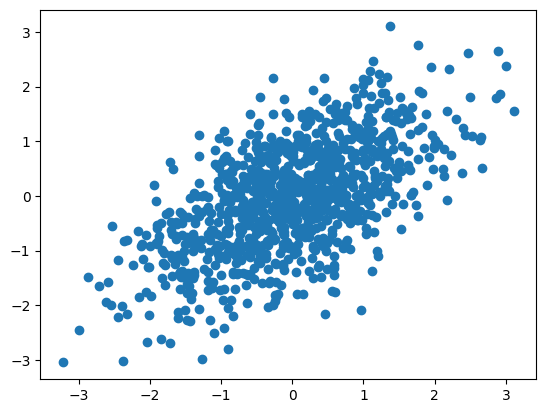

In [195]:
plt.scatter(df['variable_1'],df['variable_2'])

In [196]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

In [197]:
scaler = StandardScaler()

In [198]:
scaler.fit(df)

StandardScaler()

In [199]:
scaled_data = scaler.transform(df)

In [200]:
pca = PCA(n_components=2)

In [201]:
pca.fit(scaled_data)

PCA(n_components=2)

In [202]:
x_pca = pca.transform(scaled_data)

In [203]:
scaled_data.shape

(1000, 10)

In [204]:
x_pca.shape

(1000, 2)

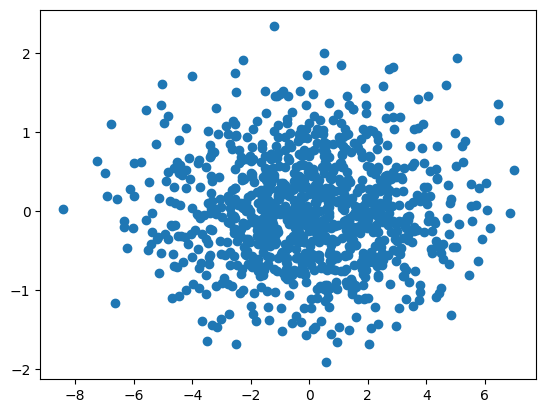

In [205]:
plt.scatter(x_pca[:,0],x_pca[:,1])

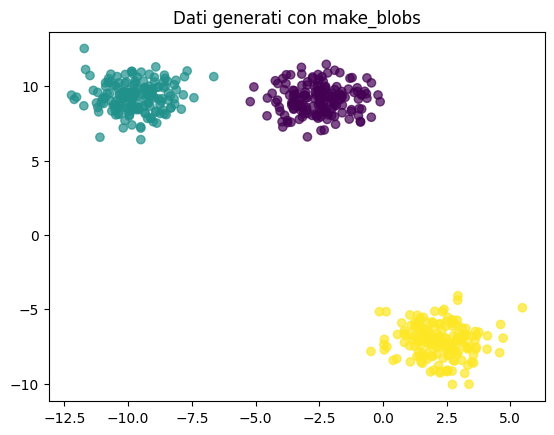

In [1]:
from sklearn.datasets import make_blobs
import matplotlib.pyplot as plt

# Genera un dataset con 3 cluster ben separabili in 10 dimensioni
X, y = make_blobs(n_samples=500, centers=3, n_features=10, random_state=42)

# Visualizza solo due dimensioni (prima della riduzione)
plt.scatter(X[:, 0], X[:, 1], c=y, cmap='viridis', alpha=0.7)
plt.title("Dati generati con make_blobs")
plt.show()

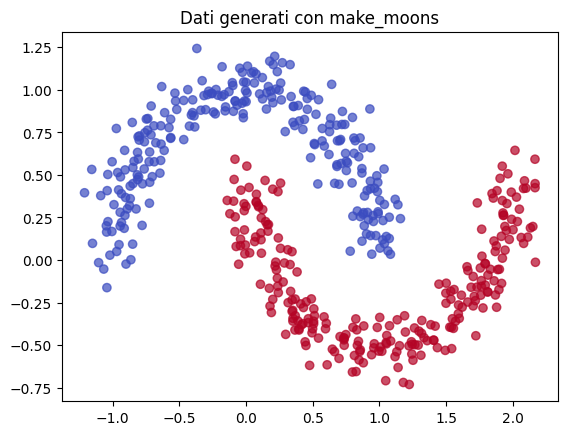

In [2]:
from sklearn.datasets import make_moons

# Genera un dataset a forma di luna crescente
X, y = make_moons(n_samples=500, noise=0.1, random_state=42)

# Visualizza i dati
plt.scatter(X[:, 0], X[:, 1], c=y, cmap='coolwarm', alpha=0.7)
plt.title("Dati generati con make_moons")
plt.show()


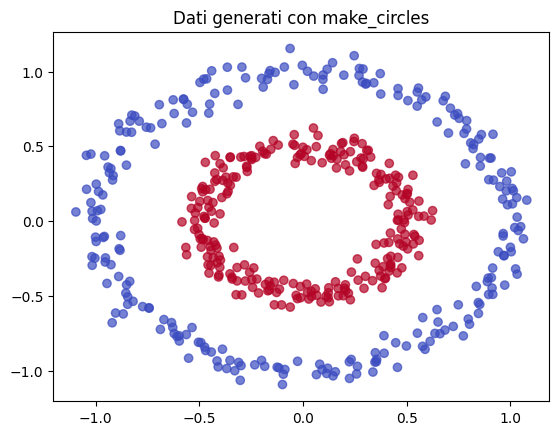

In [3]:
from sklearn.datasets import make_circles

# Genera un dataset con punti disposti su cerchi concentrici
X, y = make_circles(n_samples=500, noise=0.05, factor=0.5, random_state=42)

# Visualizza i dati
plt.scatter(X[:, 0], X[:, 1], c=y, cmap='coolwarm', alpha=0.7)
plt.title("Dati generati con make_circles")
plt.show()


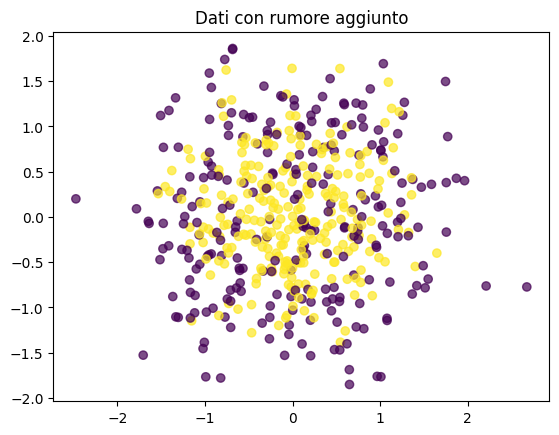

In [4]:
import numpy as np

# Aggiungi rumore ai dati di make_blobs
X_noisy = X + np.random.normal(scale=0.5, size=X.shape)

plt.scatter(X_noisy[:, 0], X_noisy[:, 1], c=y, cmap='viridis', alpha=0.7)
plt.title("Dati con rumore aggiunto")
plt.show()
